In [1]:
### Xaar FractionalRegValue Fun

##### From Xaar document
 - In order to calculate the suitable encoder it is advisable to calculate back from the required cycle frequency (85039.37 Hz)
    - Selecting the Printengine Divide (i.e. the number of subpixels) to 255 and the Prescale Divide to 1 gives a frequency of 21.7 MHz (which is <50 MHz)
    - Now the input frequency needs to be multiplied with Multiply and Fractional Multiply to exactly this value. (for instance by choosing Multiply 40 and Fractional Multiply 0.542125984)
    - This yields exactly the desired cycle frequency. To vary this now one can use the Fractional Multiply to get to very high resolutions. These are, however, limited to resolution of printhead electronics (expected to be ~85 ns).
 - The when using subpixels the offsets need to be multiplied with the respective number of subpixels.
 - Quadrature is not necessary for the application as direction is not evaluated.
 - PD inverts cycle order in Bidriectional-2PD mode

### Definition of functions

In [2]:
'''
  Define the functions to convert from one form to the other and vice versa
'''
mask = 0x7fffffff

def calcFracMultiply(fracRegVal):
    return 1.0 - (0.5 * fracRegVal / mask)

#    ie, 211360
def calcFracRegVal(fracMultiply):
    return ( (mask * (1.0 - fracMultiply)) / 0.5 )

In [3]:
'''
    Test data taken from XUSB.XML files
'''
testData = [(211360, 0.999213), (11625168, 0.956693) ]

print("-------- Test Data ------------------ Calc Data ------------- Delta -------------")
for t in testData:
    c = ( calcFracRegVal(t[1]), calcFracMultiply(t[0]) )
    delta = ( abs(t[0]-c[0]), abs(t[1]-c[1]) )
    print("(%10d, %+.8f), (%10d, %+.8f), (%10d, %+.8f)" % (t[0], t[1], c[0], c[1], delta[0], delta[1]))

-------- Test Data ------------------ Calc Data ------------- Delta -------------
(    211360, +0.99921300), (   3380139, +0.99995079), (   3168779, +0.00073779)
(  11625168, +0.95669300), ( 186002148, +0.99729330), ( 174376980, +0.04060030)


In [4]:
'''
  Create a range of values for testing function
'''
fracMultiplys = [x / 100.0 for x in range(50, 105, 5)]

# now add some corner cases
fracMultiplys.append(0.97)
fracMultiplys.append(0.98)
fracMultiplys.append(0.99)
fracMultiplys.append(0.999999)
fracMultiplys.append(0.51)
fracMultiplys.append(0.52)
fracMultiplys.append(0.542125984)
fracMultiplys.sort()
fracMultiplys

[0.5,
 0.51,
 0.52,
 0.542125984,
 0.55,
 0.6,
 0.65,
 0.7,
 0.75,
 0.8,
 0.85,
 0.9,
 0.95,
 0.97,
 0.98,
 0.99,
 0.999999,
 1.0]

In [5]:
calculatedFracRegVals = []
for fracMultiply in fracMultiplys:
    fracRegVal = calcFracRegVal(fracMultiply)
    calculatedFracRegVals.append(fracRegVal)
    print("fracMultiply: %+.3f, fracRegVal: %10d (%10s)" % (fracMultiply, int(fracRegVal), hex(int(fracRegVal))))

fracMultiply: +0.500, fracRegVal: 2147483647 (0x7fffffff)
fracMultiply: +0.510, fracRegVal: 2104533974 (0x7d70a3d6)
fracMultiply: +0.520, fracRegVal: 2061584301 (0x7ae147ad)
fracMultiply: +0.542, fracRegVal: 1966553923 (0x75373b43)
fracMultiply: +0.550, fracRegVal: 1932735282 (0x73333332)
fracMultiply: +0.600, fracRegVal: 1717986917 (0x66666665)
fracMultiply: +0.650, fracRegVal: 1503238552 (0x59999998)
fracMultiply: +0.700, fracRegVal: 1288490188 (0x4ccccccc)
fracMultiply: +0.750, fracRegVal: 1073741823 (0x3fffffff)
fracMultiply: +0.800, fracRegVal:  858993458 (0x33333332)
fracMultiply: +0.850, fracRegVal:  644245094 (0x26666666)
fracMultiply: +0.900, fracRegVal:  429496729 (0x19999999)
fracMultiply: +0.950, fracRegVal:  214748364 ( 0xccccccc)
fracMultiply: +0.970, fracRegVal:  128849018 ( 0x7ae147a)
fracMultiply: +0.980, fracRegVal:   85899345 ( 0x51eb851)
fracMultiply: +0.990, fracRegVal:   42949672 ( 0x28f5c28)
fracMultiply: +1.000, fracRegVal:       4294 (    0x10c6)
fracMultiply: 

In [6]:
calculatedFracMultiplys = []
for fracRegVal in calculatedFracRegVals:
    fracMultiply = calcFracMultiply(int(fracRegVal))
    calculatedFracMultiplys.append(fracMultiply)
    print("fracMultiply: %+.3f, fracRegVal: %10d (%10s)" % (fracMultiply, int(fracRegVal), hex(int(fracRegVal))))

fracMultiply: +0.500, fracRegVal: 2147483647 (0x7fffffff)
fracMultiply: +0.510, fracRegVal: 2104533974 (0x7d70a3d6)
fracMultiply: +0.520, fracRegVal: 2061584301 (0x7ae147ad)
fracMultiply: +0.542, fracRegVal: 1966553923 (0x75373b43)
fracMultiply: +0.550, fracRegVal: 1932735282 (0x73333332)
fracMultiply: +0.600, fracRegVal: 1717986917 (0x66666665)
fracMultiply: +0.650, fracRegVal: 1503238552 (0x59999998)
fracMultiply: +0.700, fracRegVal: 1288490188 (0x4ccccccc)
fracMultiply: +0.750, fracRegVal: 1073741823 (0x3fffffff)
fracMultiply: +0.800, fracRegVal:  858993458 (0x33333332)
fracMultiply: +0.850, fracRegVal:  644245094 (0x26666666)
fracMultiply: +0.900, fracRegVal:  429496729 (0x19999999)
fracMultiply: +0.950, fracRegVal:  214748364 ( 0xccccccc)
fracMultiply: +0.970, fracRegVal:  128849018 ( 0x7ae147a)
fracMultiply: +0.980, fracRegVal:   85899345 ( 0x51eb851)
fracMultiply: +0.990, fracRegVal:   42949672 ( 0x28f5c28)
fracMultiply: +1.000, fracRegVal:       4294 (    0x10c6)
fracMultiply: 

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

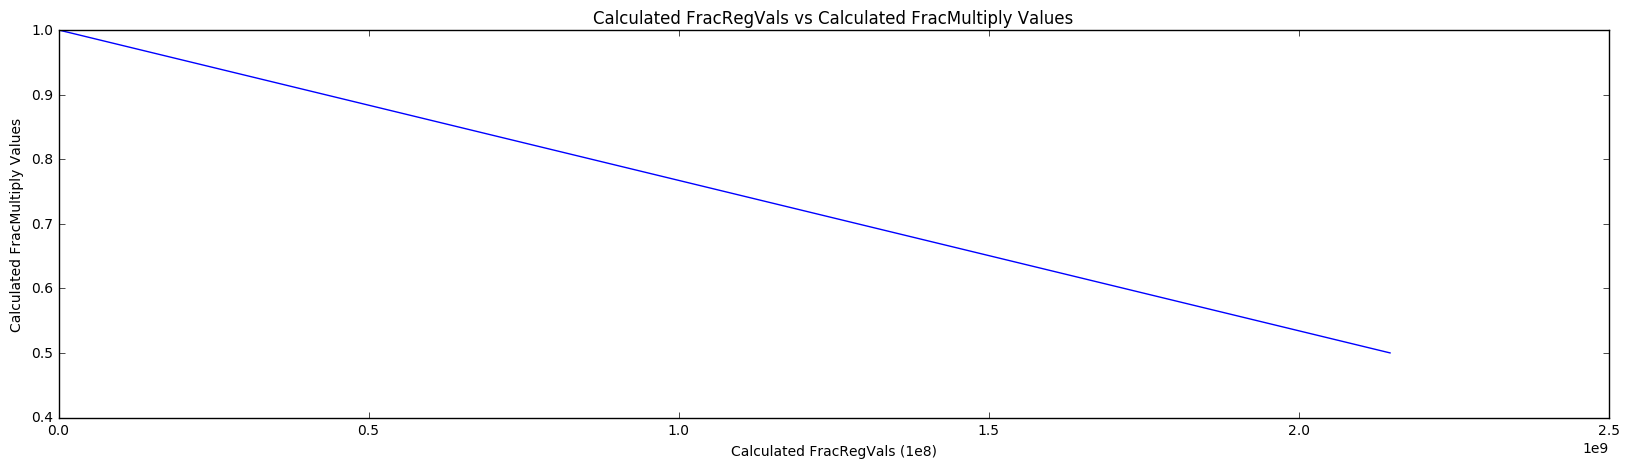

In [8]:
calculatedFracRegVals
calculatedFracMultiplys
plt.figure(figsize=(10*2,5))
plt.plot(calculatedFracRegVals, calculatedFracMultiplys, color='b')
plt.title('Calculated FracRegVals vs Calculated FracMultiply Values')
plt.xlabel('Calculated FracRegVals (1e8)')
plt.ylabel('Calculated FracMultiply Values')
plt.show()

### How to calculate Head Cycle Freq from given external encoder frequency

In [9]:
# input freq is from encoder or function gen
input_freq_Hz = 1e6

# Xaar/XPM "multiply" variables
FractionalMultiply = 0.542125984
Multiply = 40

# Xaar/XPM "divide" variables
Prescaler_divide = 1
PrintEngine_divide = 255

Head_cycle_freq_Hz = (input_freq_Hz * FractionalMultiply * Multiply) / Prescaler_divide / PrintEngine_divide

print("Head_cycle_freq_Hz  = %.2f" % (Head_cycle_freq_Hz))
print("Comparable int freq = %.2f" % (Head_cycle_freq_Hz / 3))
print("FractionalRegVal    = %d" % (calcFracRegVal(FractionalMultiply)))


Head_cycle_freq_Hz  = 85039.37
Comparable int freq = 28346.46
FractionalRegVal    = 1966553923


In [10]:
nominal_fracRegValue = 1966553923
range_per = 0.10
num = 10

lower_fracRegVal = int(nominal_fracRegValue - ((nominal_fracRegValue*range_per)))
upper_fracRegVal = int(nominal_fracRegValue + ((nominal_fracRegValue*range_per)))
print("Producing %d value between %d and %d" % ((num*2+1), lower_fracRegVal, upper_fracRegVal))

fracRegVal_freq_pairs= []
for fracRegVal in range(lower_fracRegVal, upper_fracRegVal, int((upper_fracRegVal-lower_fracRegVal)/((num*2)+1))):
    if fracRegVal <= mask:
        Head_cycle_freq_Hz = (input_freq_Hz * calcFracMultiply(fracRegVal) * Multiply) / Prescaler_divide / PrintEngine_divide
        print("Adding fracRegVal (%d) with expected head cycle freq (Hz) of %.2f" % (fracRegVal, Head_cycle_freq_Hz))
        fracRegVal_freq_pairs.append( (fracRegVal, Head_cycle_freq_Hz) )
    else:
        print("fracRegVal (%d) > max value, skipping" % (fracRegVal))


Producing 21 value between 1769898530 and 2163209315
Adding fracRegVal (1769898530) with expected head cycle freq (Hz) of 92221.71
Adding fracRegVal (1788627615) with expected head cycle freq (Hz) of 91537.68
Adding fracRegVal (1807356700) with expected head cycle freq (Hz) of 90853.64
Adding fracRegVal (1826085785) with expected head cycle freq (Hz) of 90169.61
Adding fracRegVal (1844814870) with expected head cycle freq (Hz) of 89485.58
Adding fracRegVal (1863543955) with expected head cycle freq (Hz) of 88801.55
Adding fracRegVal (1882273040) with expected head cycle freq (Hz) of 88117.51
Adding fracRegVal (1901002125) with expected head cycle freq (Hz) of 87433.48
Adding fracRegVal (1919731210) with expected head cycle freq (Hz) of 86749.45
Adding fracRegVal (1938460295) with expected head cycle freq (Hz) of 86065.42
Adding fracRegVal (1957189380) with expected head cycle freq (Hz) of 85381.39
Adding fracRegVal (1975918465) with expected head cycle freq (Hz) of 84697.35
Adding frac

In [11]:
print("Using base settings: ")
print("  input_freq_Hz      = %d" % (input_freq_Hz))
print("  Multiply           = %d" % (Multiply))
print("  Prescaler_divide   = %d" % (Prescaler_divide))
print("  PrintEngine_divide = %d" % (PrintEngine_divide))
print("-----------------------------------------------")
for fracRegVal_freq_pair in fracRegVal_freq_pairs:
    print("  Using fracRegVal (%d), expected head cycle freq (Hz) of %.2f" % (fracRegVal_freq_pair[0], fracRegVal_freq_pair[1]))  


Using base settings: 
  input_freq_Hz      = 1000000
  Multiply           = 40
  Prescaler_divide   = 1
  PrintEngine_divide = 255
-----------------------------------------------
  Using fracRegVal (1769898530), expected head cycle freq (Hz) of 92221.71
  Using fracRegVal (1788627615), expected head cycle freq (Hz) of 91537.68
  Using fracRegVal (1807356700), expected head cycle freq (Hz) of 90853.64
  Using fracRegVal (1826085785), expected head cycle freq (Hz) of 90169.61
  Using fracRegVal (1844814870), expected head cycle freq (Hz) of 89485.58
  Using fracRegVal (1863543955), expected head cycle freq (Hz) of 88801.55
  Using fracRegVal (1882273040), expected head cycle freq (Hz) of 88117.51
  Using fracRegVal (1901002125), expected head cycle freq (Hz) of 87433.48
  Using fracRegVal (1919731210), expected head cycle freq (Hz) of 86749.45
  Using fracRegVal (1938460295), expected head cycle freq (Hz) of 86065.42
  Using fracRegVal (1957189380), expected head cycle freq (Hz) of 85381

In [12]:
%lsmagic

Available line magics:
%alias  %alias_magic  %autocall  %automagic  %autosave  %bookmark  %cat  %cd  %clear  %colors  %config  %connect_info  %cp  %debug  %dhist  %dirs  %doctest_mode  %ed  %edit  %env  %gui  %hist  %history  %killbgscripts  %ldir  %less  %lf  %lk  %ll  %load  %load_ext  %loadpy  %logoff  %logon  %logstart  %logstate  %logstop  %ls  %lsmagic  %lx  %macro  %magic  %man  %matplotlib  %mkdir  %more  %mv  %notebook  %page  %pastebin  %pdb  %pdef  %pdoc  %pfile  %pinfo  %pinfo2  %popd  %pprint  %precision  %profile  %prun  %psearch  %psource  %pushd  %pwd  %pycat  %pylab  %qtconsole  %quickref  %recall  %rehashx  %reload_ext  %rep  %rerun  %reset  %reset_selective  %rm  %rmdir  %run  %save  %sc  %set_env  %store  %sx  %system  %tb  %time  %timeit  %unalias  %unload_ext  %who  %who_ls  %whos  %xdel  %xmode

Available cell magics:
%%!  %%HTML  %%SVG  %%bash  %%capture  %%debug  %%file  %%html  %%javascript  %%js  %%latex  %%perl  %%prun  %%pypy  %%python  %%python2  %%python3